In [ ]:
!pip install pycaret --quiet
!pip install dabl --quiet

In [2]:
from pycaret.classification import *
import pandas as pd
import dabl as db

In [5]:
hr_data = pd.read_csv("HR Employee Attrition.csv")

In [6]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Target looks like classification
Linear Discriminant Analysis training set score: 0.502


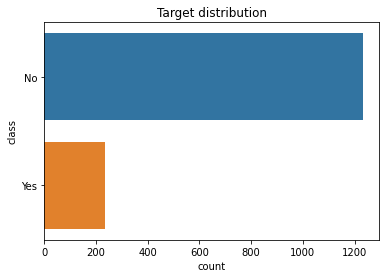

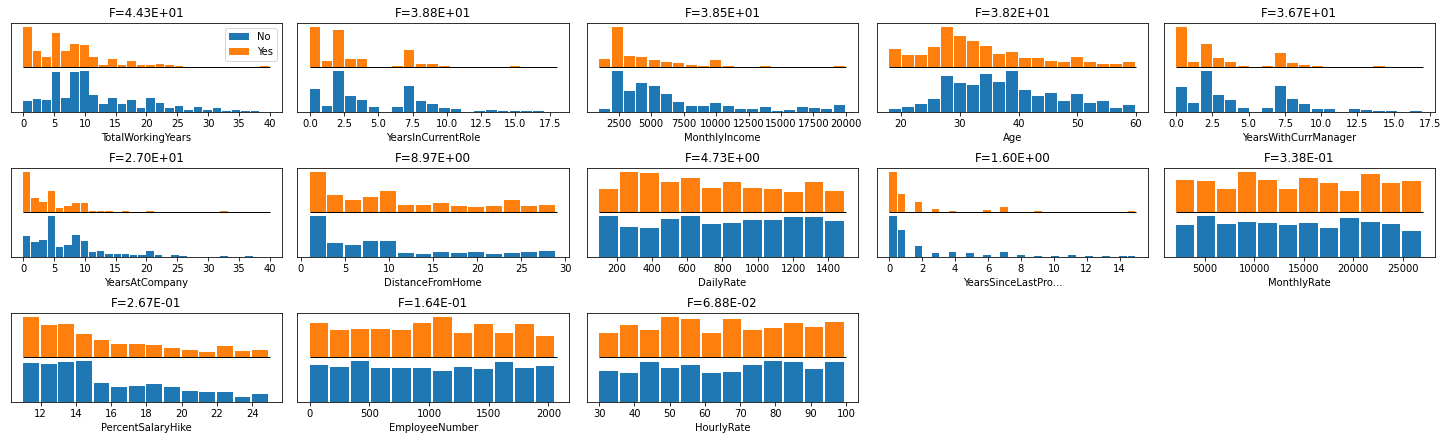

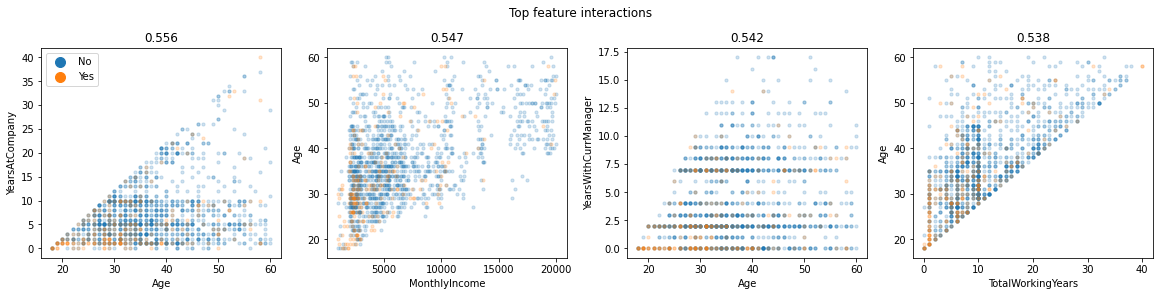

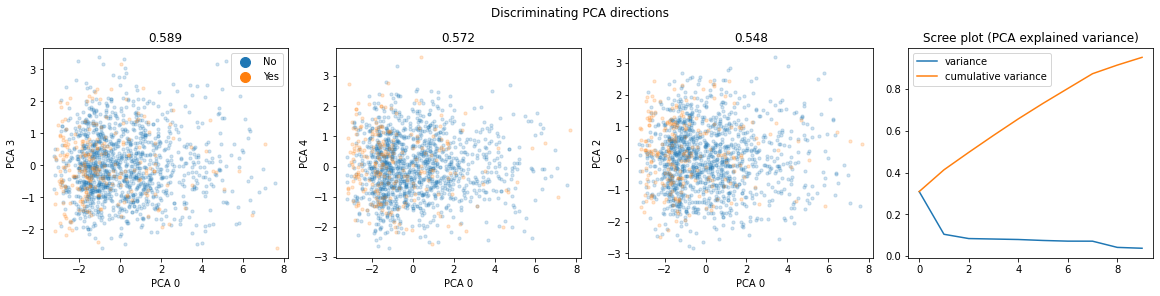

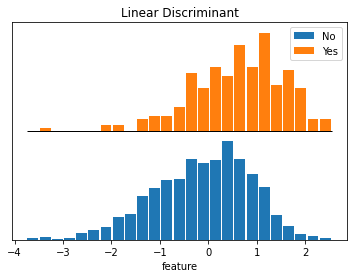

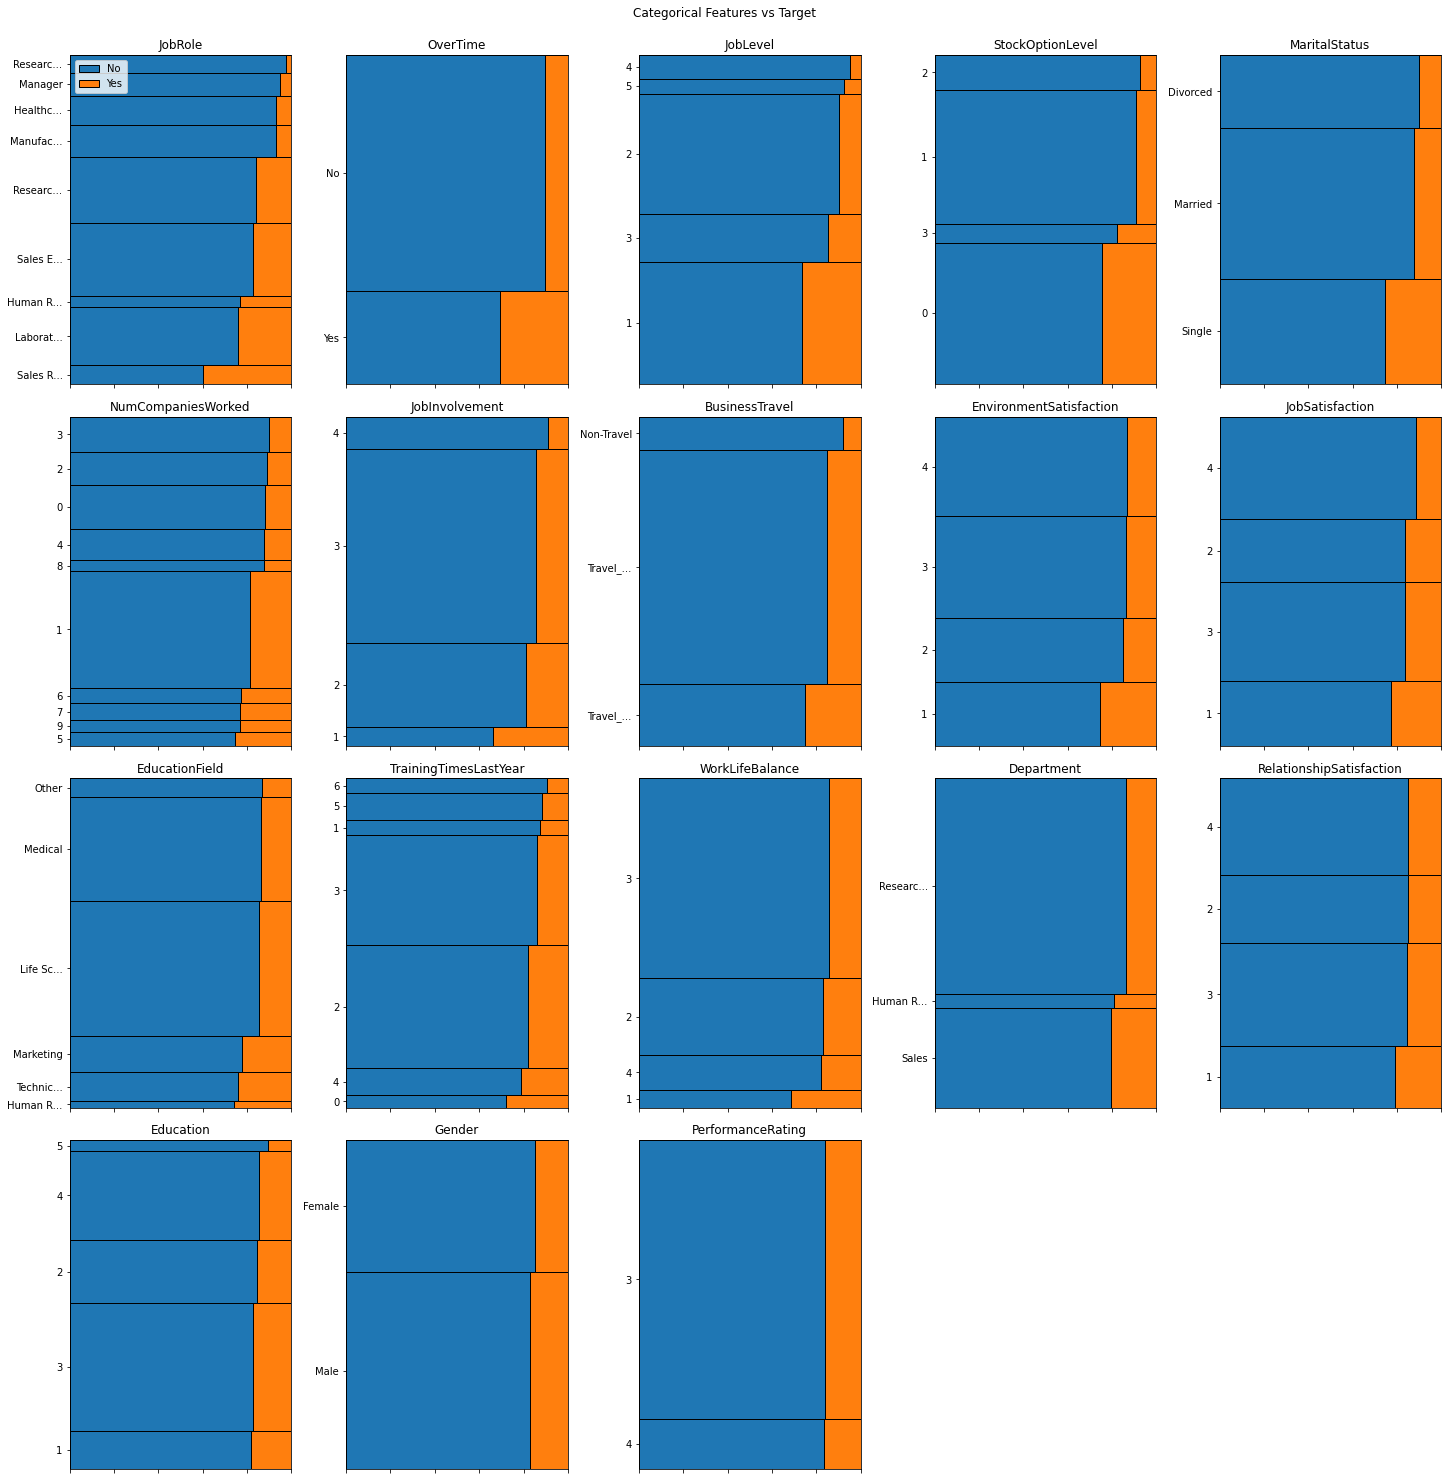

In [7]:
db.plot(hr_data, y = "Attrition")

In [12]:
target = "Attrition"

cont_feats = ["DistanceFromHome", "EmployeeCount", "HourlyRate",
              "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
              "StandardHours", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion",
              "YearsWithCurrManager", "TrainingTimesLastYear"]

bin_feats = ["Age", "DailyRate", "MonthlyIncome"]

ord_feats = {"StockOptionLevel" : ["0", "1", "2", "3"],
             "EnvironmentSatisfaction" : ["1", "2", "3", "4"],
             "JobInvolvement" : ["1", "2", "3", "4"],
             "JobSatisfaction" : ["1", "2", "3", "4"],
             "Education" : ["1", "2", "3", "4", "5"],
             "PerformanceRating" : ["3", "4"],
             "RelationshipSatisfaction" : ["1", "2", "3", "4"],
             "WorkLifeBalance" : ["1", "2", "3", "4"]}

cat_feats = ["BusinessTravel", "Department", "EducationField", "JobRole",
             "Gender", "JobLevel", "JobRole", "Over18",
             "MaritalStatus", "OverTime", "WorkLifeBalance"]

ignore = ["EmployeeNumber"]

In [31]:
setup(hr_data, target = target,
      train_size = 0.7, transformation = True,
      bin_numeric_features = bin_feats,
      numeric_features = cont_feats,
      categorical_features = cat_feats,
      ordinal_features = ord_feats,
      feature_selection = True,
      ignore_features = ignore,
      normalize = True, 
      combine_rare_levels = True,
      fix_imbalance = True,
      silent = True)

,Description,Value
0,session_id,4905
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1470, 35)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,18
8,Ordinal Features,True
9,High Cardinality Features,False


('Attrition',
 False,
 False,
 -1,
 <MLUsecase.CLASSIFICATION: 1>,
 Pipeline(memory=None,
          steps=[('fix_imbalance',
                  SMOTE(k_neighbors=5, n_jobs=None, random_state=4905,
                        sampling_strategy='auto'))],
          verbose=False),
 48      0
 122     1
 1183    0
 412     0
 607     1
        ..
 758     0
 765     0
 1225    0
 15      0
 215     0
 Name: Attrition, Length: 1028, dtype: int64,
 [],
 10,
 StratifiedKFold(n_splits=10, random_state=4905, shuffle=False),
 'box-cox',
 False,
 'lightgbm',
 [],
       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
 0      41       Yes  ...                       0                     5
 1      49        No  ...                       1                     7
 2      37       Yes  ...                       0                     0
 3      33        No  ...                       3                     0
 4      27        No  ...                       2                     2
 ...   ...   

In [32]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8716,0.8411,0.3614,0.7262,0.4772,0.4128,0.4484,11.903
gbc,Gradient Boosting Classifier,0.8775,0.8382,0.3912,0.7378,0.5038,0.4421,0.4746,0.663
lr,Logistic Regression,0.8123,0.8320,0.6941,0.4516,0.5455,0.4344,0.4514,0.109
lda,Linear Discriminant Analysis,0.7900,0.8308,0.6941,0.4172,0.5177,0.3953,0.4185,0.066
et,Extra Trees Classifier,0.8677,0.8205,0.2827,0.7560,0.4057,0.3484,0.4042,0.559
xgboost,Extreme Gradient Boosting,0.8629,0.8156,0.3493,0.6465,0.4512,0.3808,0.4055,0.781
ada,Ada Boost Classifier,0.8532,0.8146,0.5066,0.5550,0.5284,0.4418,0.4432,0.252
rf,Random Forest Classifier,0.8580,0.8136,0.2110,0.7642,0.3216,0.2688,0.3425,0.600
lightgbm,Light Gradient Boosting Machine,0.8658,0.8093,0.3136,0.6938,0.4305,0.3664,0.4044,0.293
nb,Naive Bayes,0.4164,0.6687,0.9096,0.2058,0.3355,0.0976,0.1879,0.043


In [34]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7961,0.8333,0.7500,0.4138,0.5333,0.4165,0.4467
1,0.8447,0.8068,0.6875,0.5000,0.5789,0.4866,0.4959
2,0.8252,0.7969,0.7059,0.4800,0.5714,0.4666,0.4803
3,0.7670,0.8516,0.6471,0.3793,0.4783,0.3412,0.3613
4,0.8641,0.9241,0.7059,0.5714,0.6316,0.5494,0.5540
5,0.7767,0.7544,0.5882,0.3846,0.4651,0.3317,0.3437
6,0.7379,0.6888,0.4706,0.3077,0.3721,0.2155,0.2233
7,0.8252,0.8899,0.8235,0.4828,0.6087,0.5059,0.5358
8,0.8333,0.8626,0.6875,0.4783,0.5641,0.4651,0.4769
9,0.8529,0.9121,0.8750,0.5185,0.6512,0.5656,0.5967


In [35]:
ens = ensemble_model(lr, optimize = "AUC", method = "Boosting", n_estimators = 40)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8155,0.8269,0.7500,0.4444,0.5581,0.4511,0.4757
1,0.8252,0.8218,0.6250,0.4545,0.5263,0.4224,0.4305
2,0.8058,0.7709,0.6471,0.4400,0.5238,0.4074,0.4193
3,0.7864,0.8988,0.7647,0.4194,0.5417,0.4175,0.4495
4,0.8932,0.9193,0.8824,0.6250,0.7317,0.6674,0.6829
5,0.7767,0.7538,0.6471,0.3929,0.4889,0.3568,0.3750
6,0.7476,0.7763,0.5294,0.3333,0.4091,0.2590,0.2702
7,0.8932,0.9097,0.8235,0.6364,0.7179,0.6534,0.6617
8,0.8431,0.8946,0.8125,0.5000,0.6190,0.5272,0.5519
9,0.8431,0.9172,0.9375,0.5000,0.6522,0.5627,0.6091


In [36]:
evaluate_model(ens)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
calibrate_model(lr, method = "isotonic")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8155,0.8366,0.7500,0.4444,0.5581,0.4511,0.4757
1,0.8447,0.7956,0.6875,0.5000,0.5789,0.4866,0.4959
2,0.8252,0.7989,0.7059,0.4800,0.5714,0.4666,0.4803
3,0.7573,0.8509,0.6471,0.3667,0.4681,0.3261,0.3482
4,0.8738,0.9227,0.7059,0.6000,0.6486,0.5723,0.5751
5,0.7767,0.7544,0.6471,0.3929,0.4889,0.3568,0.3750
6,0.7476,0.6761,0.4118,0.3043,0.3500,0.1977,0.2012
7,0.8738,0.8899,0.8235,0.5833,0.6829,0.6070,0.6211
8,0.8333,0.8637,0.6250,0.4762,0.5405,0.4410,0.4471
9,0.8627,0.9161,0.8750,0.5385,0.6667,0.5863,0.6137


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=1000,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=4905,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                             